In [2]:
import os, shutil
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
import cv2
from matplotlib import pyplot as plt
import keras
print("keras version: ", keras.__version__)
import tensorflow as tf
print("tensoflow version: ", tf.__version__)
import tensorflow.keras.backend as k

C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


keras version:  2.13.1
tensoflow version:  2.13.0


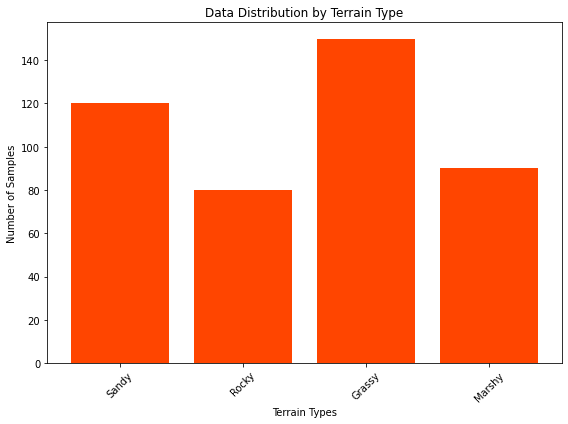

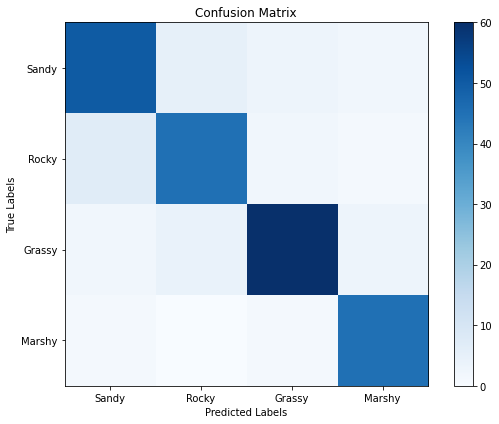

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
terrain_types = ['Sandy', 'Rocky', 'Grassy', 'Marshy']
data_counts = [120, 80, 150, 90]  # Number of samples for each terrain type

plt.figure(figsize=(8, 6))
plt.bar(terrain_types, data_counts, color='orangered')
plt.xlabel('Terrain Types')
plt.ylabel('Number of Samples')
plt.title('Data Distribution by Terrain Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

confusion_matrix = np.array([[50, 5, 3, 2],
                             [7, 45, 2, 1],
                             [2, 4, 60, 3],
                             [1, 0, 1, 45]])

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(terrain_types)), terrain_types)
plt.yticks(np.arange(len(terrain_types)), terrain_types)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
   

In [102]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.5
dataset_path="D:\\archive\\Data Main\\train"
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]
print(len(folder_names))


4


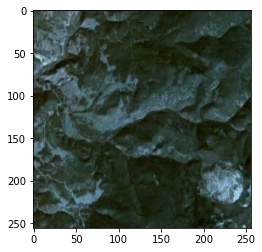

In [103]:
image_path=r"D:\archive\Data Main\train\Rocky\Rocky (1)_0_22.png"
image=cv2.imread(image_path)
plt.imshow(image)
plt.show()


In [104]:
print(image.shape)

(256, 256, 3)


In [69]:
categories_num = 4
images_number = 9
categories_selected = np.random.randint(0,4, categories_num, dtype='l')
print('Selected categories:')
print([folder_names[i] for i in categories_selected])

Selected categories:
['Rocky', 'Sandy', 'Rocky', 'Grassy']


C:\Users\ayush\AppData\Local\Temp\ipykernel_24092\167458795.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


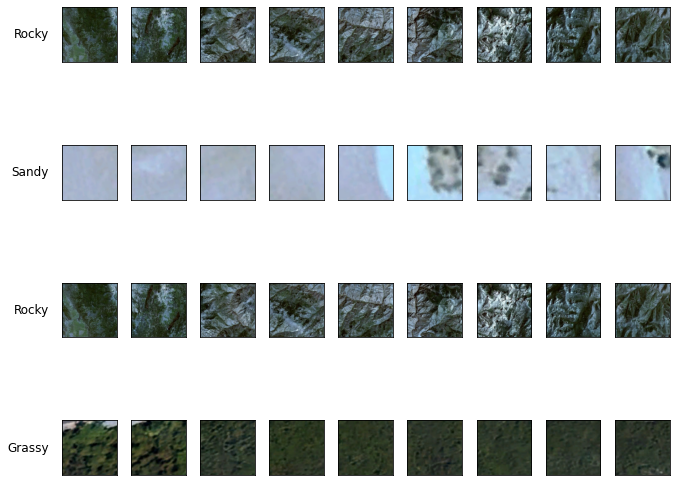

In [70]:
fig, ax = plt.subplots(nrows=4, ncols=9)
fig.set_size_inches(9.5, 8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)
for i, category in enumerate(categories_selected):
    folder_path = dataset_path + '/' + folder_names[category]
    image_names = [img for img in sorted(os.listdir(folder_path))][:images_number]
    for j, image_name in enumerate(image_names):
        image_path = folder_path + '/' + image_name
        image = cv2.imread(image_path)
        image = cv2.resize(image, (100, 100))
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if j == 0:
            pad = 5
            ax[i,j].annotate(folder_names[category],
                             xy=(0, 0.5),xytext=(-ax[i,j].yaxis.labelpad - pad,0),
                             xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                             size='large', ha='right', va='center')                 
fig.tight_layout()
fig.show()

           

In [29]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}
total_images = 0
for i, category in enumerate(folder_names):
    category_dict[i] = category
    folder_path = dataset_path + '/' + category
    image_names = [img for img in sorted(os.listdir(folder_path))]
    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names
    print('%s: %d' %(category, images_per_category_dict[i]))
    total_images += images_per_category_dict[i]
print('Total images in dataset: %d' %(total_images))



Grassy: 8512
Marshy: 7727
Rocky: 7668
Sandy: 7664
Total images in dataset: 31571


In [30]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [32]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [44]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
dataset_path,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')
validation_datagen = ImageDataGenerator(rescale=1.0/255)
val_dir = "D:\\archive\\Data Main\\val"
validation_generator = test_datagen.flow_from_directory(
directory=val_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')


Found 31571 images belonging to 4 classes.
Found 6765 images belonging to 4 classes.


In [45]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


In [49]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=80)


Epoch 1/50


C:\Users\ayush\AppData\Local\Temp\ipykernel_24092\2707660707.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


20/20 [==============================] - 13s 660ms/step - loss: 0.6121 - acc: 0.7675 - val_loss: 0.6006 - val_acc: 0.7725
Epoch 2/50
20/20 [==============================] - 13s 650ms/step - loss: 0.7047 - acc: 0.7250 - val_loss: 0.5430 - val_acc: 0.8075
Epoch 3/50
20/20 [==============================] - 13s 641ms/step - loss: 0.5614 - acc: 0.7875 - val_loss: 0.6161 - val_acc: 0.7644
Epoch 4/50
20/20 [==============================] - 13s 652ms/step - loss: 0.5851 - acc: 0.7375 - val_loss: 0.5013 - val_acc: 0.7800
Epoch 5/50
20/20 [==============================] - 12s 634ms/step - loss: 0.5798 - acc: 0.7475 - val_loss: 0.4511 - val_acc: 0.8219
Epoch 6/50
20/20 [==============================] - 12s 635ms/step - loss: 0.4656 - acc: 0.8375 - val_loss: 0.6264 - val_acc: 0.7169
Epoch 7/50
20/20 [==============================] - 12s 630ms/step - loss: 0.5727 - acc: 0.7525 - val_loss: 0.4801 - val_acc: 0.8119
Epoch 8/50
20/20 [==============================] - 12s 634ms/step - loss: 0.573

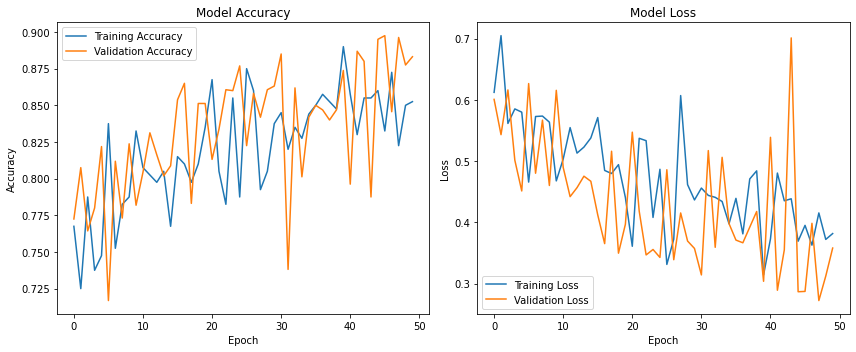

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy') 
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



Found 6765 images belonging to 4 classes.
1/1 [==============================] - 0s 35ms/step


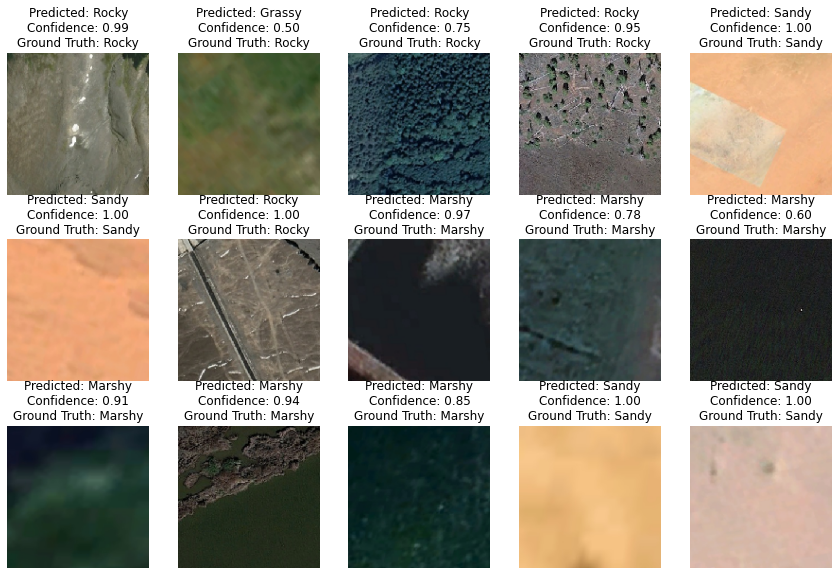

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image


def visualize_predictions(model, data_generator, terrain_classes, num_samples=5):
    plt.figure(figsize=(12, 8))
    for i in range(num_samples):
    
        batch = next(data_generator)
        images, labels = batch
        predictions = model.predict(images)
        
        for j in range(len(images)):
            plt.subplot(num_samples, len(images), i * len(images) + j + 1)
            plt.imshow(images[j])
            plt.axis('off')
            
            predicted_class = terrain_classes[np.argmax(predictions[j])]
            confidence = predictions[j].max()
            
      
            ground_truth_class = terrain_classes[np.argmax(labels[j])]
            
           
            plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}\nGround Truth: {ground_truth_class}")


terrain_classes = sorted(os.listdir(dataset_path))


visualization_datagen = test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(150, 150),
    batch_size=5, 
    class_mode='categorical'
)

num_samples = 3 

visualize_predictions(model, visualization_datagen, terrain_classes, num_samples)
plt.tight_layout()
plt.show()


In [105]:
model.save("D:\\terrain model\\terrainay.h5")

C:\Users\ayush\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
